# Model Usage

Make sure to run the script at least once to generate the models used in this.

## Environment and Imports

In [312]:
# To access files in parent directory
import os
import sys

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

parent_dir

'/Users/joshcaponigro/Documents/Coding/Fantasy-Football-Tools/FantasyPointsEstimator'

In [313]:
# Local modules
from data_processing import load_data, impute_missing_values_with_zero
from feature_engineering import create_feature_columns

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [315]:
"""
REQUIRED COLUMNS FOR MODEL PREDICTION
"""

FEATURES = [
    "home",
    "Oppt_ARI",
    "Oppt_ATL",
    "Oppt_BAL",
    "Oppt_BUF",
    "Oppt_CAR",
    "Oppt_CHI",
    "Oppt_CIN",
    "Oppt_CLE",
    "Oppt_DAL",
    "Oppt_DEN",
    "Oppt_DET",
    "Oppt_GB",
    "Oppt_HOU",
    "Oppt_IND",
    "Oppt_JAX",
    "Oppt_KC",
    "Oppt_LA",
    "Oppt_LAC",
    "Oppt_LV",
    "Oppt_MIA",
    "Oppt_MIN",
    "Oppt_NE",
    "Oppt_NO",
    "Oppt_NYG",
    "Oppt_NYJ",
    "Oppt_PHI",
    "Oppt_PIT",
    "Oppt_SEA",
    "Oppt_SF",
    "Oppt_TB",
    "Oppt_TEN",
    "Oppt_WAS",
    "Team_ARI",
    "Team_ATL",
    "Team_BAL",
    "Team_BUF",
    "Team_CAR",
    "Team_CHI",
    "Team_CIN",
    "Team_CLE",
    "Team_DAL",
    "Team_DEN",
    "Team_DET",
    "Team_GB",
    "Team_HOU",
    "Team_IND",
    "Team_JAX",
    "Team_KC",
    "Team_MIA",
    "Team_MIN",
    "Team_NE",
    "Team_NO",
    "Team_NYG",
    "Team_NYJ",
    "Team_PHI",
    "Team_PIT",
    "Team_SEA",
    "Team_SF",
    "Team_TB",
    "Team_TEN",
    "Team_WAS",
    "season_attempts",
    "recent_attempts",
    "prev_attempts",
    "season_completions",
    "recent_completions",
    "prev_completions",
    "season_passing_yards",
    "recent_passing_yards",
    "prev_passing_yards",
    "season_passing_tds",
    "recent_passing_tds",
    "prev_passing_tds",
    "season_interceptions",
    "recent_interceptions",
    "prev_interceptions",
    "season_carries",
    "recent_carries",
    "prev_carries",
    "season_rushing_yards",
    "recent_rushing_yards",
    "prev_rushing_yards",
    "season_rushing_tds",
    "recent_rushing_tds",
    "prev_rushing_tds",
    "season_receptions",
    "recent_receptions",
    "prev_receptions",
    "season_targets",
    "recent_targets",
    "prev_targets",
    "season_receiving_yards",
    "recent_receiving_yards",
    "prev_receiving_yards",
    "season_receiving_tds",
    "recent_receiving_tds",
    "prev_receiving_tds",
    "season_special_teams_tds",
    "recent_special_teams_tds",
    "prev_special_teams_tds",
    "season_rushing_fumbles",
    "recent_rushing_fumbles",
    "prev_rushing_fumbles",
    "season_receiving_fumbles",
    "recent_receiving_fumbles",
    "prev_receiving_fumbles",
    "season_sack_fumbles",
    "recent_sack_fumbles",
    "prev_sack_fumbles",
    "season_passing_yards_per_attempt",
    "recent_passing_yards_per_attempt",
    "prev_passing_yards_per_attempt",
    "season_rushing_yards_per_carry",
    "recent_rushing_yards_per_carry",
    "prev_rushing_yards_per_carry",
    "season_passing_yards_squared",
    "recent_passing_yards_squared",
    "prev_passing_yards_squared",
    "season_rushing_yards_squared",
    "recent_rushing_yards_squared",
    "prev_rushing_yards_squared",
    "season_receiving_yards_per_target",
    "recent_receiving_yards_per_target",
    "prev_receiving_yards_per_target",
    "season_receiving_yards_per_reception",
    "recent_receiving_yards_per_reception",
    "prev_receiving_yards_per_reception",
    "fantasy_points_lag1",
    "fantasy_points_lag2",
]

## Configuration

Change model filepath to point at the correct model to be used.

In [316]:
MODEL_FILEPATH = f"../output/models/QB/RandomForest_20240901214804.joblib"

## Model

In [317]:
model = joblib.load(MODEL_FILEPATH)

### Input

In [318]:
PLAYER_NAME = "Tom Brady"
YEAR = 2019

In [319]:
def get_player_data():
    data = load_data(years=[YEAR], filepath="../data")
    return data.loc[
        (data["player_name"] == PLAYER_NAME)
        | (data["player_display_name"] == PLAYER_NAME)
    ]

In [320]:
data = get_player_data()

In [321]:
assert data.shape[0] != 0, f"Player {PLAYER_NAME} not found in data."

Now use the feature engineering used for models

In [322]:
df = pd.DataFrame(data)
df, features = create_feature_columns(df)

In [323]:
display(df)

,player_id,player_name,player_display_name,position,position_group,headshot_url,recent_team,season,week,season_type,...,prev_passing_yards_squared,season_rushing_yards_squared,recent_rushing_yards_squared,prev_rushing_yards_squared,season_receiving_yards_per_target,recent_receiving_yards_per_target,prev_receiving_yards_per_target,season_receiving_yards_per_reception,recent_receiving_yards_per_reception,prev_receiving_yards_per_reception
0,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,NE,2019,1,REG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,NE,2019,3,REG,...,116281.0,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,NE,2019,6,REG,...,93636.0,0.500000,0.500000,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,NE,2019,8,REG,...,111556.0,12.333333,12.333333,36.0,NaN,NaN,NaN,NaN,NaN,NaN
4,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,NE,2019,12,REG,...,67081.0,9.250000,9.250000,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,NE,2019,14,REG,...,36100.0,9.200000,11.500000,9.0,NaN,NaN,NaN,NaN,NaN,NaN
6,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,NE,2019,16,REG,...,28561.0,74.333333,111.250000,400.0,NaN,NaN,NaN,NaN,NaN,NaN
7,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,NE,2019,17,REG,...,73441.0,66.000000,106.250000,16.0,NaN,NaN,NaN,NaN,NaN,NaN
8,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,NE,2019,18,POST,...,48841.0,57.750000,106.250000,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [343]:
# show null columns and rows
df.isnull().sum()

player_id                              0
player_name                            0
player_display_name                    0
position                               0
position_group                         0
                                      ..
predicted_fantasy_points_upper_68      0
predicted_fantasy_points_lower_95      0
predicted_fantasy_points_upper_95      0
predicted_fantasy_points_lower_99.7    0
predicted_fantasy_points_upper_99.7    0
Length: 321, dtype: int64

In [324]:
display(df[["fantasy_points_ppr"]])

,fantasy_points_ppr
0,25.64
1,20.14
2,21.96
3,18.36
4,11.30
5,10.76
6,17.24
7,14.84
8,6.36


In [325]:
features_df = df[features]

### Safety Check

In [326]:
features_df.columns, features_df.shape

(Index(['home', 'Oppt_BUF', 'Oppt_CLE', 'Oppt_DAL', 'Oppt_KC', 'Oppt_MIA',
        'Oppt_NYG', 'Oppt_NYJ', 'Oppt_PIT', 'Oppt_TEN', 'Team_NE',
        'season_attempts', 'recent_attempts', 'prev_attempts',
        'season_completions', 'recent_completions', 'prev_completions',
        'season_passing_yards', 'recent_passing_yards', 'prev_passing_yards',
        'season_passing_tds', 'recent_passing_tds', 'prev_passing_tds',
        'season_interceptions', 'recent_interceptions', 'prev_interceptions',
        'season_carries', 'recent_carries', 'prev_carries',
        'season_rushing_yards', 'recent_rushing_yards', 'prev_rushing_yards',
        'season_rushing_tds', 'recent_rushing_tds', 'prev_rushing_tds',
        'season_receptions', 'recent_receptions', 'prev_receptions',
        'season_targets', 'recent_targets', 'prev_targets',
        'season_receiving_yards', 'recent_receiving_yards',
        'prev_receiving_yards', 'season_receiving_tds', 'recent_receiving_tds',
        'prev_re

In [327]:
# Quick safety check
assert features_df.shape[0] > 0 and features_df.shape[1] > 0, "DataFrame must be 2D"

In [328]:
def ensure_all_columns(df: pd.DataFrame, required_columns: list) -> pd.DataFrame:
    for col in required_columns:
        if col not in df.columns:
            df[col] = 0
    df = df[required_columns]
    return df


features_df = ensure_all_columns(features_df.copy(), FEATURES)

In [329]:
features_df.columns, features_df.shape

(Index(['home', 'Oppt_ARI', 'Oppt_ATL', 'Oppt_BAL', 'Oppt_BUF', 'Oppt_CAR',
        'Oppt_CHI', 'Oppt_CIN', 'Oppt_CLE', 'Oppt_DAL',
        ...
        'recent_rushing_yards_squared', 'prev_rushing_yards_squared',
        'season_receiving_yards_per_target',
        'recent_receiving_yards_per_target', 'prev_receiving_yards_per_target',
        'season_receiving_yards_per_reception',
        'recent_receiving_yards_per_reception',
        'prev_receiving_yards_per_reception', 'fantasy_points_lag1',
        'fantasy_points_lag2'],
       dtype='object', length=130),
 (9, 130))

In [330]:
assert (
    list(features_df.columns) == FEATURES
), "DataFrame columns are not in the correct order."

In [331]:
features_df = impute_missing_values_with_zero(features_df, FEATURES)

### Prediction

In [332]:
prediction = model.predict(features_df)

### Output

In [333]:
prediction

array([ 7.92918325, 19.75012873, 19.91728198, 21.30307413, 19.52236509,
       19.88271458, 18.9834511 , 18.57269979, 18.35951704])

In [334]:
df = pd.concat([df, features_df], axis=1)
df["predicted_fantasy_points"] = prediction
df["difference"] = df["predicted_fantasy_points"] - df["fantasy_points_ppr"]

df[
    [
        "player_name",
        "week",
        "fantasy_points_ppr",
        "predicted_fantasy_points",
        "difference",
    ]
]

,player_name,week,fantasy_points_ppr,predicted_fantasy_points,difference
0,T.Brady,1,25.64,7.929183,-17.710817
1,T.Brady,3,20.14,19.750129,-0.389871
2,T.Brady,6,21.96,19.917282,-2.042718
3,T.Brady,8,18.36,21.303074,2.943074
4,T.Brady,12,11.30,19.522365,8.222365
5,T.Brady,14,10.76,19.882715,9.122715
6,T.Brady,16,17.24,18.983451,1.743451
7,T.Brady,17,14.84,18.572700,3.732700
8,T.Brady,18,6.36,18.359517,11.999517


In [335]:
df["difference"].describe()

count     9.000000
mean      1.957824
std       8.688743
min     -17.710817
25%      -0.389871
50%       2.943074
75%       8.222365
max      11.999517
Name: difference, dtype: float64

<Axes: >

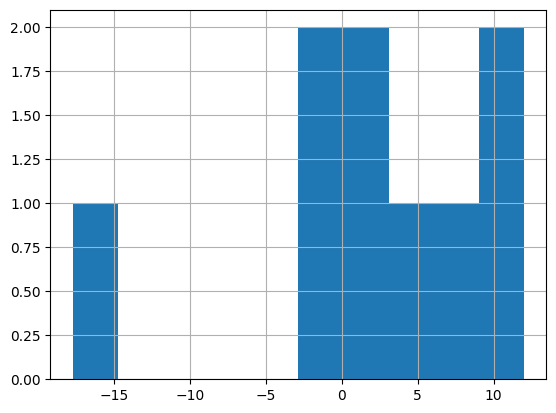

In [336]:
df["difference"].hist()

In [337]:
mean_diff = df["difference"].mean()
std_diff = df["difference"].std()

mean_diff, std_diff

(1.957823963381308, 8.688742913529644)

<Axes: >

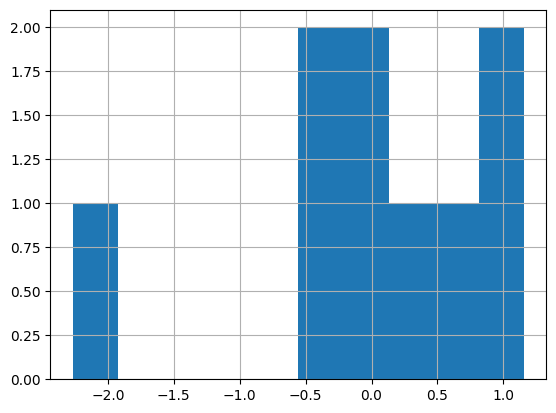

In [338]:
# how many are each std dev away from the mean?
df["std_devs"] = (df["difference"] - mean_diff) / std_diff

df["std_devs"].hist()

In [339]:
# now calculate how many predictions are within 1 std dev, 2 std dev, etc
for i in range(1, 4):
    num_within = df.loc[df["std_devs"].abs() <= i].shape[0]
    print(f"{num_within} within {i} std devs")

7 within 1 std devs
8 within 2 std devs
9 within 3 std devs


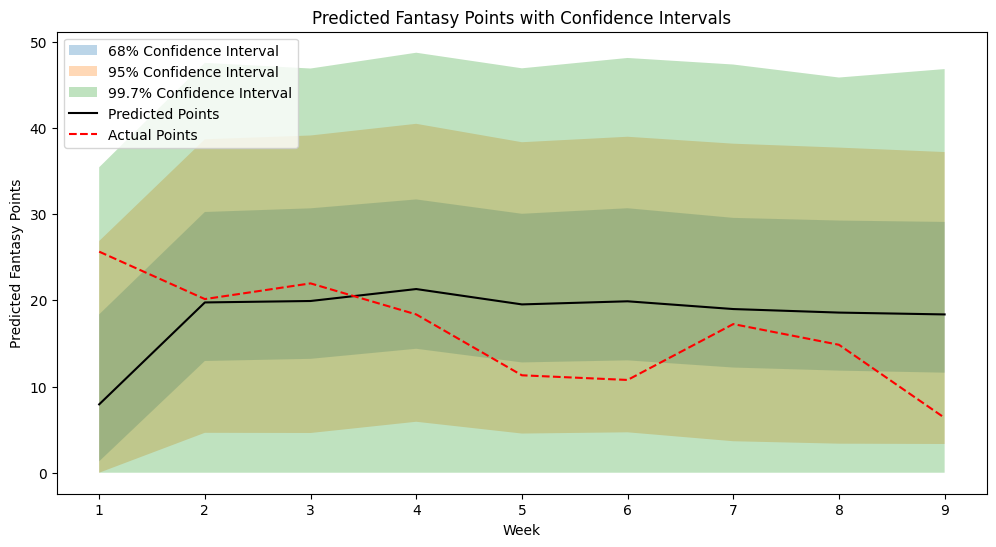

In [340]:
# Monte Carlo Simulation
num_simulations = 10000
simulated_outcomes = []

for _ in range(num_simulations):
    noise = np.random.normal(mean_diff, std_diff, size=prediction.shape)
    simulated_outcome = prediction + noise
    simulated_outcomes.append(simulated_outcome)

simulated_outcomes = np.array(simulated_outcomes)

confidence_levels = [68, 95, 99.7]
intervals = {}

for level in confidence_levels:
    lower_percentile = (100 - level) / 2
    upper_percentile = 100 - lower_percentile
    lower_bound = np.percentile(simulated_outcomes, lower_percentile, axis=0)
    upper_bound = np.percentile(simulated_outcomes, upper_percentile, axis=0)
    intervals[level] = (lower_bound, upper_bound)

# Adding the confidence intervals to the DataFrame
df["predicted_fantasy_points"] = prediction
for level in confidence_levels:
    df[f"predicted_fantasy_points_lower_{level}"] = np.maximum(intervals[level][0], 0)
    df[f"predicted_fantasy_points_upper_{level}"] = np.maximum(intervals[level][1], 0)

# Set the index to start from 1 and label it as 'Week'
df.index = range(1, len(df) + 1)
df.index.name = "Week"

plt.figure(figsize=(12, 6))
for level in confidence_levels:
    plt.fill_between(
        df.index,
        df[f"predicted_fantasy_points_lower_{level}"],
        df[f"predicted_fantasy_points_upper_{level}"],
        alpha=0.3,
        label=f"{level}% Confidence Interval",
    )

# Plot predicted fantasy points
plt.plot(
    df.index,
    df["predicted_fantasy_points"],
    label="Predicted Points",
    color="black",
)

# Plot actual fantasy points
plt.plot(
    df.index,
    df["fantasy_points_ppr"],
    label="Actual Points",
    color="red",
    linestyle="--",
)

plt.xlabel("Week")
plt.ylabel("Predicted Fantasy Points")
plt.title("Predicted Fantasy Points with Confidence Intervals")
plt.legend()
plt.show()

In [341]:
df["difference"].abs().sum()

57.90722776389834